# 1. Numpy, matplotlib, pandas - histogramy

Stručná otázka toho, jak s histogramy pracují tři kanonické knihovny pro numerické počítání / analýzu dat v Pythonu.
Omezíme se na jednorozměrné příklady, mějme však na paměti, že existují i funkce pro více dimenzí.

In [1]:
# Co jsme to dostali za soubor?
!ls -lLh ../data/teploty.csv.gz
!zcat ../data/teploty.csv.gz | head -n 10

-rwxrwxrwx. 1 root root 1,6M 31. bře 11.27 ../data/teploty.csv.gz
8.599999999999999645e+00
8.900000000000000355e+00
9.099999999999999645e+00
9.199999999999999289e+00
9.400000000000000355e+00
9.400000000000000355e+00
9.400000000000000355e+00
9.300000000000000711e+00
9.199999999999999289e+00
9.000000000000000000e+00

gzip: stdout: Broken pipe


**Poznámka**: V původním souboru bylo ~80 milionů hodnot, ale díky tomu by byl repozitář zbytečně veliký. Proto je zde jen ukázka o milionu hodnot.

In [2]:
# Pojďme si data načíst
import pandas as pd
import numpy as np
vsechny_teploty = np.asarray(pd.read_csv("../data/teploty.csv.gz", squeeze=True, dtype=np.float32, header=None))

In [3]:
# Zkontrolujme na několika prvních, že se nám načetly správně
vsechny_teploty[:10]

array([ 8.60000038,  8.89999962,  9.10000038,  9.19999981,  9.39999962,
        9.39999962,  9.39999962,  9.30000019,  9.19999981,  9.        ], dtype=float32)

In [4]:
# A kolik jich je?
vsechny_teploty.shape

(1000000,)

In [5]:
# Jsou všechny údaje v pořádku?
vsechny_teploty.max()

450.0

In [6]:
# Pro jistotu omezíme teploty na "rozumné" rozmezí
vsechny_teploty = vsechny_teploty[vsechny_teploty > -50]
vsechny_teploty = vsechny_teploty[vsechny_teploty < 50]

## numpy

In [7]:
counts, bins = np.histogram(vsechny_teploty)
counts, bins

(array([  6470,  94489, 244737, 221500, 218935, 144580,  54947,  12322,
          1602,    394]),
 array([-10.89999962,  -4.82999973,   1.24000015,   7.31000004,
         13.37999992,  19.44999981,  25.51999969,  31.58999958,
         37.65999947,  43.72999935,  49.79999924]))

### Co to udělá?

Vrátí tuple, který obsahuje jednak obsah binů, jednak všechny hranice binů.

*Poznámka: Hranice mezi biny jsou "ošklivé".*

### Odkazy

API dokumentace:

* <https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html>

## matplotlib

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  9.07000000e+02,   5.56300000e+03,   2.63560000e+04,
          6.81330000e+04,   1.15321000e+05,   1.29416000e+05,
          1.16220000e+05,   1.05280000e+05,   1.16004000e+05,
          1.02931000e+05,   8.35020000e+04,   6.10780000e+04,
          3.59210000e+04,   1.90260000e+04,   9.06300000e+03,
          3.25900000e+03,   1.05800000e+03,   5.44000000e+02,
          2.78000000e+02,   1.16000000e+02]),
 array([-10.89999962,  -7.86499968,  -4.82999973,  -1.79499979,
          1.24000015,   4.2750001 ,   7.31000004,  10.34499998,
         13.37999992,  16.41499987,  19.44999981,  22.48499975,
         25.51999969,  28.55499964,  31.58999958,  34.62499952,
         37.65999947,  40.69499941,  43.72999935,  46.76499929,  49.79999924]),
 <a list of 20 Patch objects>)

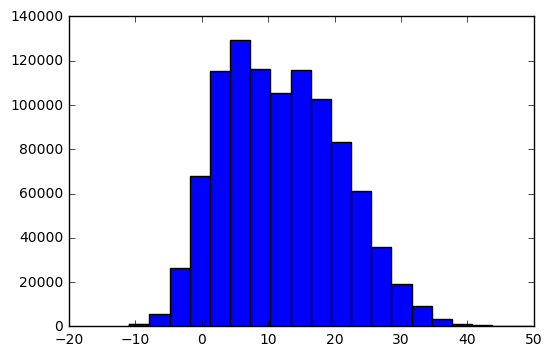

In [9]:
plt.hist(vsechny_teploty, bins=20)

### Co udělá?

* nakreslí graf
* vrátí tuple (bins, counts, list obdélníků), podobně jako numpy

### Odkazy

API dokumentace:

* <http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist>

Příklady:

* <http://matplotlib.org/examples/pylab_examples/histogram_percent_demo.html>
* <http://matplotlib.org/examples/statistics/histogram_demo_multihist.html>

## pandas

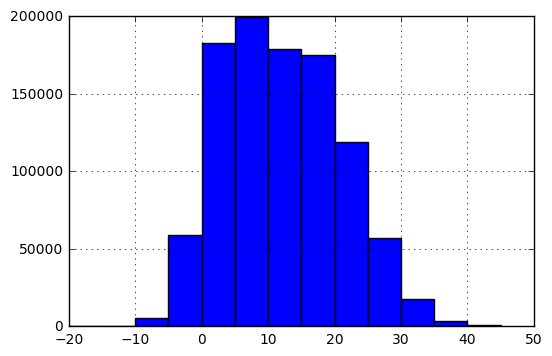

In [10]:
pd.Series(vsechny_teploty).hist(bins=range(-20, 50, 5))

### Co udělá?

* nakreslí graf
* vrátí objekt typu AxesSublot

### Odkazy

API dokumentace:
    
* <http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html>
* <http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html>

## Seaborn (bonus)

In [11]:
import seaborn as sns

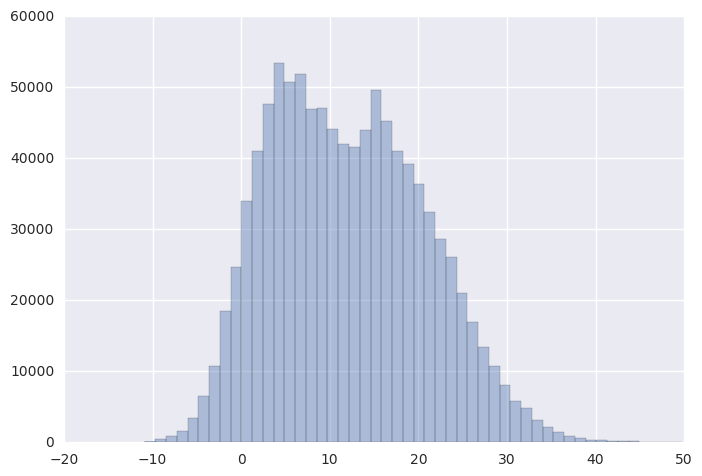

In [12]:
sns.distplot(vsechny_teploty, hist=True, kde=False)

/home/honza/opt/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(-50, 50)

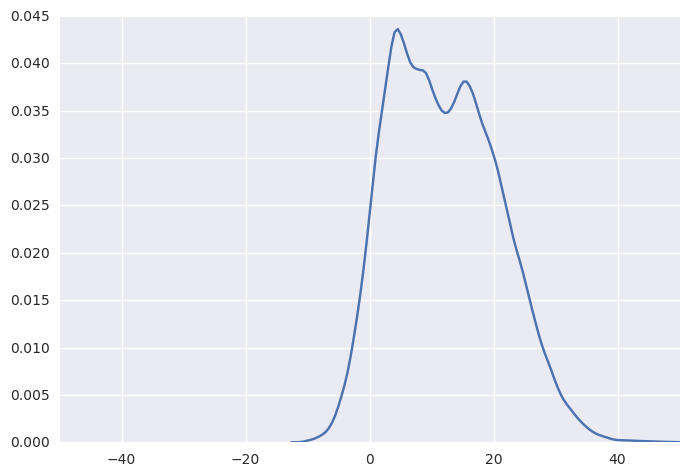

In [13]:
_, ax = plt.subplots()
sns.distplot(vsechny_teploty, hist=False, kde=True, ax=ax)
ax.set_xlim(-50, 50)

### Odkazy

API dokumentace:

* <http://seaborn.pydata.org/generated/seaborn.distplot.html>

Příklady:

* <http://seaborn.pydata.org/examples/distplot_options.html>
